Imagine a "chemical reaction" between Expo markers and Expo caps. Note that a marker can have up to two caps on it -- one on either end. 

Now, imagine you start with a bag of many uncapped Expo markers, and another bag of the same number of Expo caps. For each "interaction", take one random marker and a cap, and see if they fit together. In order to fit, the marker must have an end that does not have a cap already (i.e., it has a free space for a cap). If they fit, put the cap on the marker, and return the capped marker to the marker bag. If there is no fit, just return the marker to the bag and keep the cap for later. An important caveat is that one-cap markers are likely less "reactive" than no-cap markers, since one bonding site is already used up. (Two-cap markers _cannot_ react further.) 

# What is the proportion of no-cap markers, one-cap markers, and two-cap markers after all caps have been used up?

In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: {equationNumbers: {autoNumber: "AMS"}}
});


<IPython.core.display.Javascript object>

In [4]:
n = 10000 # number of uncapped markers and caps initially

In [5]:
p = 0.5 # reduction in reactivity of single-cap markers. 0.5 corresponds to 1/2 as reactive as uncapped

Now, we set up a Markov Chain transition matrix. Suppose we have a vector $\vec{v}_k = (x_k, y_k, z_k)$ whose entries denote the probability of drawing a no-cap, one-cap, or two-cap marker are $x_k$, $y_k$, and $z_k$, respectively, after $k$ draws. Clearly, $\vec{v}_0 = (1,0,0)$, since all markers start off being uncapped. Also, we know that the sum of the entries in $\vec{v}_k$ is $1$ for all $k \ge 0$. A transition (or "stochastic") matrix gives the next $\vec{v}$ based on the current $\vec{v}$. Mathematically, if the stochastic matrix is $P$, $P\vec{v}_k = \vec{v}_{k+1}$. To find this, we solve for $x_{k+1}, y_{k+1}$, and $z_{k+1}$ in terms of $x_{k}, y_{k}$, and $z_{k}$.

## Finding the stochastic matrix

**Equation for $x_{k+1}$**

We start by finding $x_{k+1}$ by using a weighted average. On draw $k$, a no-cap will be drawn $x_k$ of the time. In this case, the no-cap will become a one-cap, thus decreasing $x_{k+1}$. Note that any time a marker changes configuration (i.e., when it gains a cap), the change in proportion of each configuration is $\pm 1/n$. If a no-cap is *not* drawn, $x_{k+1} = x_k$.


\begin{align}
x_{k+1} &= x_k(x_k-\frac{1}{n}) + (1-x_k)(x_k) \\
&= x_k^2-\frac{x_k}{n}+x_k-x_k^2\\
&= x_k(1-\frac{1}{n})
\end{align}
Equation (1) results from the fact that with probability $x_k$, $x_{k+1} = x_k - 1/n$, and every other time, $x_{k+1} = x_k$. This calculuation is similar to that of rolling a weighted die to find the average outcome.
$$x_{k+1} = \begin{bmatrix} 1-\frac{1}{n} & 0 & 0 \end{bmatrix} \cdot \begin{bmatrix} x_k \\ y_k \\ z_k \end{bmatrix}$$



**Equation for $y_{k+1}$**

We use a similar process to calculate $y_{k+1}$. However, recall that even if a one-capped marker interacts with a cap, this interaction may not result in a successful reaction. Imagine the cap hits the end of the marker that has already been capped -- this would not result in a successful reaction. Thus, the probability of a one-cap converting to a two-cap on draw $k$ is $p\cdot y_k$. Also recall that $x_k$ of the time, there will be an addition of a one-cap (since a no-cap was just chosen and converted).


\begin{align}
y_{k+1} &= x_k(y_k+\frac{1}{n}) + py_k(y_k-\frac{1}{n})+(1-p)y_k(y_k)+z_k(y_k)\\
&= x_ky_k + \frac{x_k}{n} + {py_k^2}-\frac{p}{n}y_k + y_k^2-{py_k^2}+y_kz_k\\
&= \frac{x_k}{n}+y_k(x_k+y_k+z_k-\frac{p}{n})\\
&= \frac{x_k}{n} + y_k(1-\frac{p}{n})
\end{align}
The first term of the right hand side of (4) accounts for when a no-cap is selected and becomes a one-cap. The second term accounts for when a one-cap is selected and it reacts. The third is when a one-cap is selected and it does not react, and the third is when a two-cap is selected.
$$y_{k+1} = \begin{bmatrix} \frac{1}{n} & 1-\frac{p}{n} & 0 \end{bmatrix} \cdot \begin{bmatrix} x_k \\ y_k \\ z_k \end{bmatrix}$$

**Equation for $z_{k+1}$**

Lastly, we find $z_{k+1}$. $z$ should increase when a one-cap is drawn and reacted (with probability $p\cdot y_k$) and stay the same every other time.


\begin{align}
z_{k+1} &= py_k(z_k+\frac{1}{n}) + (1-py_k)(z_k)\\
&= py_kz_k + \frac{p}{n}y_k + z_k - py_kz_k\\
&= y_k(\frac{p}{n}) + z_k
\end{align}
Equation (8) is derived the same way as in the previous two cases.
$$z_{k+1} = \begin{bmatrix} 0 & \frac{p}{n} & 1 \end{bmatrix} \cdot \begin{bmatrix} x_k \\ y_k \\ z_k \end{bmatrix}$$

Altogether, we have:


\begin{align}
x_{k+1} &= x_k(1-\frac{1}{n})\\
y_{k+1} &= \frac{x_k}{n} + y_k(1-\frac{p}{n})\\
z_{k+1} &= y_k(\frac{p}{n}) + z_k
\end{align}
Or represented as a matrix:

$$\begin{bmatrix}
x_{k+1}\\
y_{k+1}\\
z_{k+1}
\end{bmatrix} 
=
\begin{bmatrix}
1-\frac{1}{n} & 0 & 0\\
\frac{1}{n} & 1-\frac{p}{n} & 0\\
0 & \frac{p}{n} & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
x_{k}\\
y_{k}\\
z_{k}
\end{bmatrix}$$



This is our stochastic matrix! Recall the following regarding a stochastic matrix $P$:


\begin{align*}
P\vec{v}_0 &= \vec{v}_1 \\
P\vec{v}_1 &= \vec{v}_2 \\
P(P\vec{v}_0) &= \vec{v}_2 \\
P^2\vec{v}_0 &= \vec{v}_2 \\
&\vdots\\
P^n\vec{v}_0 &= \vec{v}_n
\end{align*}


Using the math above, the following function calculates the powers of our original stochastic matrix, multiplies it by $\vec{v}_0 = (1,0,0)$ to get $\vec{v}_k$ for all $k$, and appends to a list of all xvals, yvals, and zvals the corresponding proportion in $\vec{v}_k$. 

## Knowing when the reaction is over

The last point to consider is when the reaction is over -- when to stop exponentiating the matrix and appending x, y, and z values. The end point of the reaction is actually *not* after $n$ powers of the matrix. While this does represent the proportions after $n$ draws, not all draws actually result in a reaction and use up a cap. What we do know is that when the reaction is over, the amount of no-caps and two-caps are the same. Here is why:

Suppose we have $x$ no-capped markers, $y$ one-capped markers, and $z$ two-capped markers. Since the total number of markers is $n$, we have $$x + y + z = n$$ Similarly, the total number of caps equals $n$, so $$y + 2z = n$$. Thus, \begin{align} x+y+z &= y+2z \\ x+z &= 2z  \\ x=z \end{align}

Thus, while we don't know exactly how many times we have to exponentiate the stochastic matrix, we can estimate it using the Intermediate Value Theorem. Since $x>z$ initially, there must be a last instance where $x>z$ and a first instance where $z>x$. By the IVT, somewhere in between these two points $x=z$, and this is where the reaction ends. Thus, after each time we add to our list of $x$, $y$, and $z$ values, we should check whether $z>x$. 

## Python code

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
def marker_cap(n, p, showplot):
    stochastic = np.array([
        [1-1/n, 0      , 0],
        [1/n  , 1-(p/n), 0],
        [0    , p/n    , 1]
    ])

    base = stochastic # constant stochastic matrix to the first power to be used to iterate powers of matrix

    # initialize proportions so that 100% are uncapped ('state x')
    xvals = [1]
    yvals = [0]
    zvals = [0]


    rxn_length = 1 # keeps track of length of reaction in number of interactions 

    while xvals[-1] > zvals[-1]: # fill in x, y, and z lists until x less than z (end of reaction)
        xvals.append(stochastic[0,0]) # just grabs data from first column of stochastic since this is the result when multiplying by (1,0,0)
        yvals.append(stochastic[1,0])
        zvals.append(stochastic[2,0])
        stochastic = np.matmul(stochastic, base)
        rxn_length += 1

    leftIndex = rxn_length-2 # last instance where there is more x than z
    rightIndex = rxn_length-1 # first instance where there is more z than x
    # since Markov Chains are discrete, we will not get the exact equivalence point between x and z. Thus, we will average leftIndex and rightIndex to get a good approx.

    for i in range(rxn_length): # continues the lists going for twice as long, so that end of reaction is in middle of the lists (to make things pretty)
        xvals.append(stochastic[0,0])
        yvals.append(stochastic[1,0])
        zvals.append(stochastic[2,0])
        stochastic = np.matmul(stochastic, base)
    
    if showplot: 
        plt.plot(xvals, color = "g", label="proportion no cap")
        plt.plot(yvals, color="r", label="proportion one cap")
        plt.plot(zvals, color="b", label="proportion two cap")
        plt.axvline(x=(leftIndex+rightIndex)/2, color="k", label="end of rxn", linestyle="dashed")
        plt.legend()
        plt.xlabel("number of marker-cap interactions")
        plt.ylabel("proportion of marker states")
        plt.title("proportion of marker states vs. number of marker-cap interactions")
    
    def endratio():
        xprop = (xvals[leftIndex] + xvals[rightIndex])/2 
        yprop = (yvals[leftIndex] + yvals[rightIndex])/2
        zprop = (zvals[leftIndex] + zvals[rightIndex])/2

        return [round(xprop,4), round(yprop,4), round(zprop,4)]
    
    return endratio()


## Results

**p = 0.5**

[0.25, 0.5, 0.25]

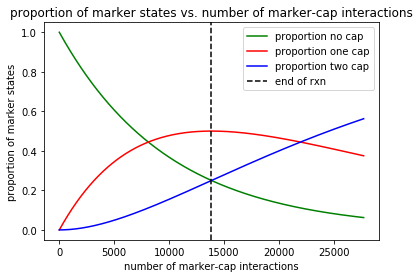

In [8]:
marker_cap(10000, 0.5, True)

NOTE: anything to the right of the "end of rxn" line is dependent on there being an excess of Expo caps. Recall that all caps are used up at the dotted line!

**p = 1.0** -- What if there was no decrease in reactivity between no-cap and one-cap markers?

[0.3178, 0.3643, 0.3178]

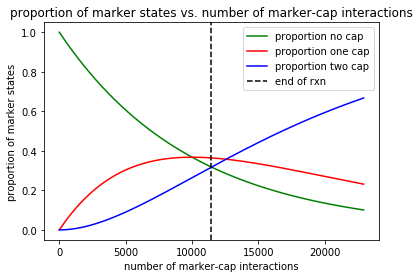

In [9]:
marker_cap(10000, 1, True)

## Randomized Approach

The process above uses *expected* values to calculate the proportions of the markers, creating a smooth curve. In reality, though, the process is random, creating opportunities for the true proportions to deviate from the expected curves. Below is a program that runs randomized simulations of the reaction, all with $p=0.5$ (credit to Mr. Maltbaek for idea).

In [43]:
import random
import sys
sys.setrecursionlimit(1000000)

def random_simulation(n,p):
    nocap = [n]
    onecap = [0]
    twocap = [0]
    time = [0]

    def run():
        
        if twocap[-1] > nocap[-1]: 
            pass
        
        else: 
            r = random.random()
            if r < nocap[-1]/n:
                nocap.append(nocap[-1]-1)
                onecap.append(onecap[-1]+1)
                twocap.append(twocap[-1])
            elif r < nocap[-1]/n + p*onecap[-1]/n:
                nocap.append(nocap[-1])
                onecap.append(onecap[-1]-1)
                twocap.append(twocap[-1]+1)
            else:
                nocap.append(nocap[-1])
                onecap.append(onecap[-1])
                twocap.append(twocap[-1])
            time.append(time[-1]+1)
            run()
            
            
    run()
    rxn_length = time[-1]
    
    for i in range(rxn_length):
        r = random.random()
        if r < nocap[-1]/n:
            nocap.append(nocap[-1]-1)
            onecap.append(onecap[-1]+1)
            twocap.append(twocap[-1])
        elif r < nocap[-1]/n + p*onecap[-1]/n:
            nocap.append(nocap[-1])
            onecap.append(onecap[-1]-1)
            twocap.append(twocap[-1]+1)
        else:
            nocap.append(nocap[-1])
            onecap.append(onecap[-1])
            twocap.append(twocap[-1])
        time.append(time[-1]+1)
        
    
    plt.scatter(time, nocap, s=0.5, color="g", label='number of no cap')
    plt.scatter(time, onecap, s=0.5, color="r", label='number of one cap')
    plt.scatter(time, twocap, s=0.5, color="b", label = 'number of two cap')
    plt.axvline(x=rxn_length, color="k", label="end of rxn", linestyle="dashed")
    plt.legend()
    plt.xlabel("number of marker-cap interactions")
    plt.ylabel("number of markers")
    plt.title("number of markers vs. number of marker-cap interactions")

    print("nocap: " + str(nocap[rxn_length]/n))
    print("onecap: " + str(onecap[rxn_length]/n))
    print("twocap: " + str(twocap[rxn_length]/n))

***n* = 100**

nocap: 0.23
onecap: 0.53
twocap: 0.24


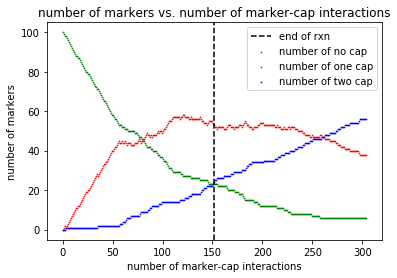

In [48]:
random_simulation(100, 0.5)

Notice that whenever there is an increase in two-cap markers, there necessarily is a decrease in one-cap markers. This graph shows this well, whereas the theoretical graphs hide this. 

***n* = 10000**

nocap: 0.248
onecap: 0.5039
twocap: 0.2481


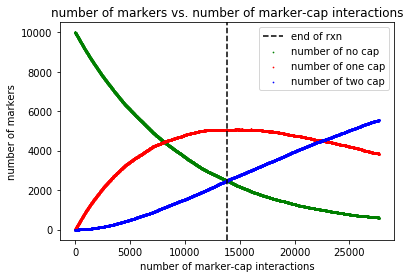

In [38]:
random_simulation(10000, 0.5)

As $n$ increases sufficiently, the curves of the random proportions converge to the theoretical proportions plotted earlier. Also notice how the end of reaction proportions approach the theoretical proportions as $n$ increases.

However, the reactivity of one-caps is likely even less than half that of the no-caps. For example, imagine the caps were very large and blocked other caps from even approaching the other end of the marker. In this case, the yield of the one-caps would be higher than 50%, since fewer one-caps would have the opportunity to become two-caps. This begs the question:

# Given a lab result, what is the relative reactivity of one-cap markers compared to no-cap markers?

For this problem, we will input the true proportion of one-cap markers and output the relative reactivity of one-cap markers compared to no-cap markers. To do this, we will input a lower and upper bounds for the reactivity constant, and use binary search to find a reactivity constant within `error` of the true proportion.

In [16]:
def find_reactivity(true_prop, lo, hi, error):
    mid = (lo + hi)/2 # start searching in the middle
    while abs(marker_cap(10000, mid, 0)[1] - true_prop) >= error: # loop while approximation is not good enough
        if marker_cap(10000, mid, 0)[1] > true_prop: # need to increase mid, since a low one-cap reactivity leads to a high proportion of one-caps
            lo = mid
            mid = (lo + hi)/2
        else: # decrease mid
            hi = mid
            mid = (lo + hi)/2
    return mid

## Suppose the true yield of one-caps is 90%. What is the relative reactivity of one-caps?

In [17]:
find_reactivity(0.90, 0.0, 1.0, 0.001)

0.025390625

To double check:

[0.0503, 0.8995, 0.0503]

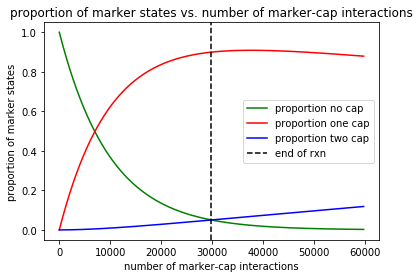

In [18]:
marker_cap(10000, 0.02539, True)

And we see that the end proportion of one-caps is within 0.001 of the true proportion of 0.90